LOUVAT Charles 

MOHAMED Ben-Hazem

github : https://github.com/carloslvt

----

Objectifs du TP :

- découvrir l’apprentissage par perceptron multi-couches
- utiliser scikit-learn pour déterminer une architecture MLP performante pour un jeu de données

Apprentissage par perceptron multi-couches sous sklearn
---

La plate-forme sklearn, depuis sa version 0.18.1, fournit quelques fonctionnalités pour l’apprentissage à partir de perceptron multi-couches, en classification (classe MLPClassifier) et en régression
(classe MLPRegressor)

La classe MLPClassifier : mise en pratique
---

Ce modèle optimise la fonction entropie croisée en utilisant le solveur LBFGS ou la descente de gradient stochastique. Ses paramètres principaux sont les suivants :

- hidden layer sizes est un tuple qui spécifie le nombre de neurones de chaque couche cachée, de l’entrée (non comprise) vers la sortie (non  comprise). Par exemple, une couche cachée de 55 neurones, hidden layer sizes=(55) ; pour trois couches cachées de taille respectivement 50, 12 et 100 neurones, hidden layer sizes=(50,12,100).
- activation définit la fonction d’activation pour les couches cachées
- solver spécifie l’algorithme utilisé pour minimiser la fonction de perte en sortie
- alpha est la magnitude de la régularisation L2
- max iter indique le nombre max d’itérations du solveur
- tol est un facteur de tol´erance qui permet d’arrêter le solveur précocèment lorsque qu’il n’y a pas d’amélioration d’au moins ce paramètre lors de deux itérations successives
- learning rate init permet de contrôler la taille du pas

Les fonctions usuelles d’apprentissage et de test de sklearn d’un modèle sont alors applicables (fit, predict, score, predict proba, etc.). La composante coefs du modèle contient les matrices de paramètres qui constituent le modèle, et intercepts contient les poids des biais dans les couches
cachées et de sortie.

Travail sur le jeu de données MNIST
---

MNIST a été développé par les précurseurs du deep learning, Y. LeCun et Y. Bengio, en 1998. Il
contient des données d’´ecriture manuelle des chiffres de 0 à 9. Il mène généralement à un problème de
classification multi-classes à 10 classes. Dans sa forme initiale, l’´echantillon d’apprentissage comporte
60000 exemples, et 10000 en test.
Un exemple en entrée est une image de taille fixe 28 ⇥ 28, chaque pixel étant blanc (0) ou noir (1).

Un exemple est donc un vecteur de 28*28=784 composantes correspondant à un niveau de gris pour chacun des 784 pixels.

Il est possible de le charger sous sklearn avec l’instruction mns = fetch mldata("MNIST original")
du package datasets.

In [1]:
from sklearn.datasets import fetch_openml
import warnings   
warnings.filterwarnings("ignore")

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


Commençons par visualiser les données

<AxesSubplot:ylabel='count'>

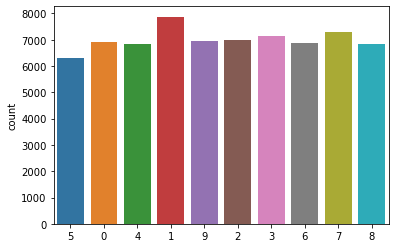

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.countplot(y)

La répartition semble à peu près équitable.

Visualisons maintenant les images avec leurs labels.

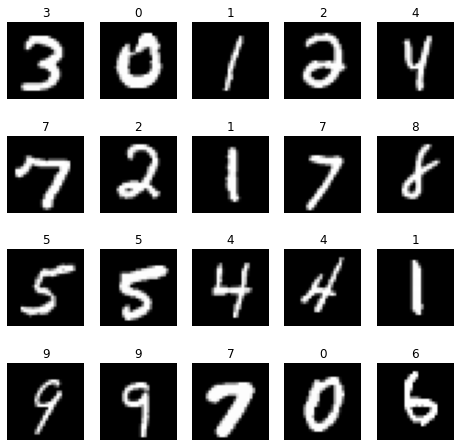

In [3]:
def plot_digits(img, y):
    cols = min(5, len(img))
    rows = len(img) // cols
    fig = plt.figure(figsize=(8,8))
    
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        plt.axis('off')
        plt.imshow(img[i], cmap = 'gray')
        ax.set_title(y[i])
    plt.show()
    
a = np.random.permutation(len(X))
a = a[:20]
plot_digits(X[a].reshape(-1, 28, 28), y[a])

Par la suite, les apprentissages se feront sur les 60000 premiers exemples, et
les tests se feront sur les exemples restants dans l’echantillon chargé. Il s’agit du protocole utilisé
par tous les chercheurs testant eurs algorithmes sur MNIST.

In [4]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

En faisant varier les différents hyper-paramètres du modèle, avec ou sans pre-processing, et en
utilisant une GridSearch, parvenez-vous à battre les quelques références ci-après ? Indiquez le temps
d’apprentissage du modèle et tous ses hyper-paramètres et paramètres.

![score](Capture7.png)

Sans pre-processing
---

In [5]:
from sklearn.neural_network import MLPClassifier
import time

start = time.time()

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

print(f'Temps d’apprentissage du modèle : {time.time() - start}')

Temps d’apprentissage du modèle : 98.94686961174011


In [6]:
from sklearn.metrics import accuracy_score

y_pred = mlp.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test, y_pred)}')

Accuracy score : 0.9645


Avec pre-processing
---

Pour le pre-processing, nous allons standardiser les données :

In [7]:
mean_px = X.mean().astype(np.float32)
std_px = X.std().astype(np.float32)
X_preprocess = (X - mean_px)/(std_px)

In [11]:
X_train, X_test = X_preprocess[:60000], X_preprocess[60000:]
y_train, y_test = y[:60000], y[60000:]

In [23]:
start = time.time()

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

print(f'Temps d’apprentissage du modèle : {time.time() - start}')

Temps d’apprentissage du modèle : 216.98397040367126


In [24]:
y_pred = mlp.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test, y_pred)}')

Accuracy score : 0.9766


Super, en normalisant les données on améliore le temps d'apprentissage et l'accuracy score. Nous pouvons maintenant rechercher les hyperparamètres optimaux avec un gridsearch

GridSearch
---

In [8]:
X_train, X_test = X_preprocess[:60000], X_preprocess[60000:]
y_train, y_test = y[:60000], y[60000:]

Nous avons réalisé notre GridSearch sur un autre PC, et voici les hyperparamètres optimaux que nous avons obtenus

In [44]:
start = time.time()

mlp = MLPClassifier(alpha=0.1, max_iter=200, hidden_layer_sizes=(500,300), solver="adam")
mlp.fit(X_train, y_train)

print(f'Temps d’apprentissage du modèle : {time.time() - start}')

Temps d’apprentissage du modèle : 195.87163996696472


In [45]:
y_pred = mlp.predict(X_test)
print(f'Accuracy score : {accuracy_score(y_test, y_pred)}')

Accuracy score : 0.9805


Avec ces paramètres, nous avons encore obtenu un meilleur score !